# LNG Price Recoupling and Energy Pool

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Net Exporter

In [81]:
imp_exp = pd.read_csv('data/natgas-imports-exports-netimports.csv', skiprows = 6,
                     names = ['Year', 'Imports', 'Exports'])

imp_exp['Net Export'] =  imp_exp['Exports'] - imp_exp['Imports']

imp_exp.head()

,Year,Imports,Exports,Net Export
0,1950,0.00,0.03,0.03
1,1951,0.00,0.02,0.02
2,1952,0.01,0.03,0.02
3,1953,0.01,0.03,0.02
4,1954,0.01,0.03,0.02


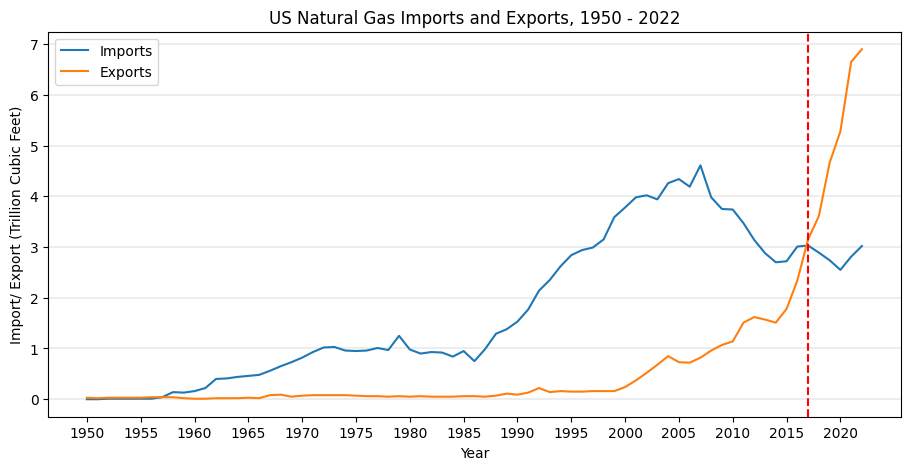

In [82]:
imp_exp.plot('Year', ['Imports', 'Exports'],
             title = 'US Natural Gas Imports and Exports, 1950 - 2022',
             ylabel = 'Import/ Export (Trillion Cubic Feet)',
            figsize = (11,5))
plt.xticks(np.arange(1950, 2022, 5))
plt.grid(axis='y', color='gray', linewidth=0.2)
plt.axvline(x=2017, color='red', linestyle = '--');

In [83]:
#show that US changed to net exporter in 2017
imp_exp[imp_exp["Year"].isin([2016, 2017])][['Year', 'Net Export']]

,Year,Net Export
66,2016,-0.67
67,2017,0.12


<Axes: xlabel='Year'>

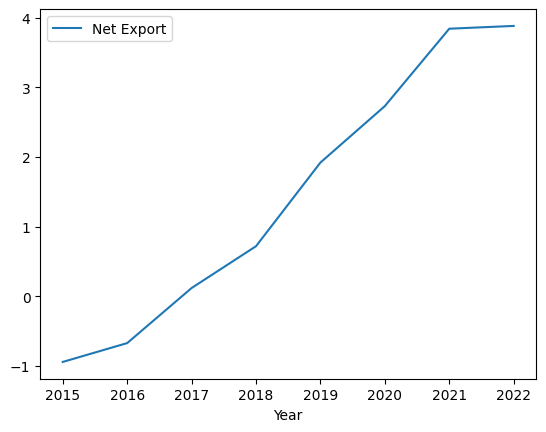

In [84]:
imp_exp[imp_exp["Year"] >= 2015].plot('Year', 'Net Export')

## Prices

In [85]:
#Henry Hub start Jan 1997
henry_hub = pd.read_csv('data/Henry_Hub_Natural_Gas_Spot_Price.csv',
                       skiprows = 5, names = ['Date', 'Henry Hub Spot Price'])

henry_hub['Date'] = pd.to_datetime(henry_hub['Date'], format='%b %Y')

henry_hub.tail()

,Date,Henry Hub Spot Price
328,1997-05-01,2.25
329,1997-04-01,2.03
330,1997-03-01,1.89
331,1997-02-01,2.15
332,1997-01-01,3.45


In [86]:
# Oil WTI prices starting Jan 1986
wti = pd.read_csv('data/Cushing_OK_WTI_Spot_Price_FOB.csv',
                  skiprows = 5, names = ['Date', 'WTI Spot Price'])

wti['Date'] = pd.to_datetime(wti['Date'], format='%b %Y')

wti.tail()

,Date,WTI Spot Price
461,1986-05-01,15.38
462,1986-04-01,12.84
463,1986-03-01,12.61
464,1986-02-01,15.46
465,1986-01-01,22.93


WTI energy parity = 0.172, WTI NGCC parity = 0.127 (-4 for LTR)

In [87]:
wti['WTI Spot Price Energy Parity'] = wti['WTI Spot Price'] * 0.172

wti['WTI Spot Price NGCC Parity'] = wti['WTI Spot Price'] * 0.127 - 4

#NGCC Parity only applies after 2016
wti.loc[wti['Date'] < '2016-01-01', 'WTI Spot Price NGCC Parity'] = pd.NA

wti.tail()

,Date,WTI Spot Price,WTI Spot Price Energy Parity,WTI Spot Price NGCC Parity
461,1986-05-01,15.38,2.64536,NaN
462,1986-04-01,12.84,2.20848,NaN
463,1986-03-01,12.61,2.16892,NaN
464,1986-02-01,15.46,2.65912,NaN
465,1986-01-01,22.93,3.94396,NaN


In [88]:
prices = henry_hub.merge(wti, on = "Date", how = "left")

prices.drop('WTI Spot Price', axis = 1, inplace = True)

prices

,Date,Henry Hub Spot Price,WTI Spot Price Energy Parity,WTI Spot Price NGCC Parity
0,2024-09-01,2.28,12.08128,4.92048
1,2024-08-01,1.99,13.18896,5.73836
2,2024-07-01,2.07,14.06960,6.38860
3,2024-06-01,2.54,13.72044,6.13079
4,2024-05-01,2.12,13.76344,6.16254
...,...,...,...,...
328,1997-05-01,2.25,3.58104,NaN
329,1997-04-01,2.03,3.38840,NaN
330,1997-03-01,1.89,3.60684,NaN
331,1997-02-01,2.15,3.81496,NaN


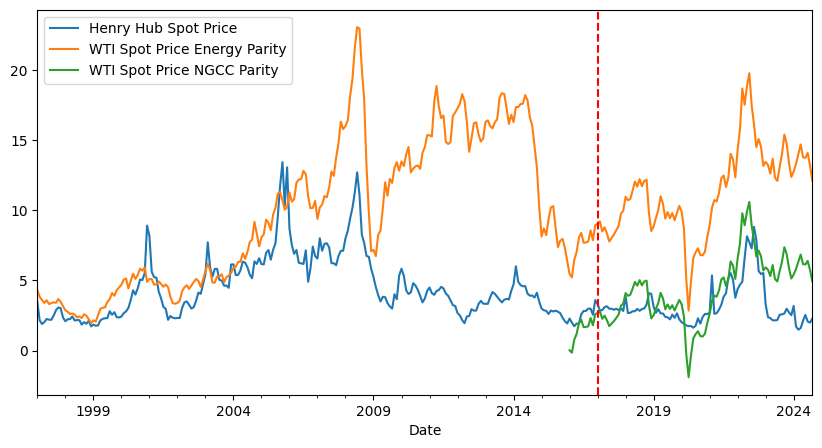

In [91]:
prices.plot('Date', ['Henry Hub Spot Price', 'WTI Spot Price Energy Parity', 'WTI Spot Price NGCC Parity'],
             figsize = (10,5))
plt.axvline(x='2017-01-01', color='red', linestyle = '--')
             

In [93]:
prices['Energy Parity Difference'] = abs(prices['WTI Spot Price Energy Parity'] - prices['Henry Hub Spot Price'])
prices['NGCC Parity Difference'] = abs(prices['WTI Spot Price NGCC Parity'] - prices['Henry Hub Spot Price'])

prices.head()

,Date,Henry Hub Spot Price,WTI Spot Price Energy Parity,WTI Spot Price NGCC Parity,Energy Parity Difference,NGCC Parity Difference
0,2024-09-01,2.28,12.08128,4.92048,9.80128,2.64048
1,2024-08-01,1.99,13.18896,5.73836,11.19896,3.74836
2,2024-07-01,2.07,14.06960,6.38860,11.99960,4.31860
3,2024-06-01,2.54,13.72044,6.13079,11.18044,3.59079
4,2024-05-01,2.12,13.76344,6.16254,11.64344,4.04254


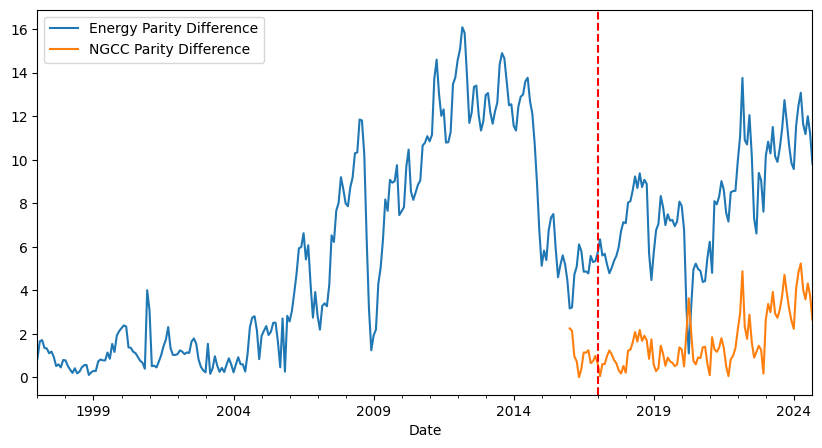

In [94]:
prices.plot('Date', ['Energy Parity Difference', 'NGCC Parity Difference'],
             figsize = (10,5))
plt.axvline(x='2017-01-01', color='red', linestyle = '--')